Companion Jupyter Notebook to the article [Climate is What You Expect](https://towardsdatascience.com/climate-is-what-you-expect-20c57da1ac24) published in Towards Data Science.

## Importing Packages

In [1]:
import warnings
import intake
import xarray as xr 
import proplot as plot 
import matplotlib.pyplot as plt 

from esmtools.stats import*

warnings.filterwarnings('ignore')

## Open dataset

In [2]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcc/full_v7/precip.mon.total.2.5x2.5.v7.nc'

In [3]:
dset = xr.open_dataset(url)

In [4]:
dset

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 1356)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    history:                         Created 01/2016 based on V7 data obtaine...
    title:                           GPCC Precipitation Full V7 2.5x2.5 Month...
    Conventions:                     CF 1.0
    References:                      http://www.esrl.noaa.gov/psd/data/gridde...
    Original_Source:                 http://www.dwd.de/en/FundE/Klima/KLIS/in...
    Reference:                       Users of the data sets are kindly reques...
    original_source:                 ftp://ftp-anon.dwd.de/pub/data/gpcc/html...
    dataset_title:                   Global Precipitation Climatology Centre ...
    DODS_EXTRA.Unlimited_Dimension:  time
    EXTRA_DIMENSION.nbnds:           2

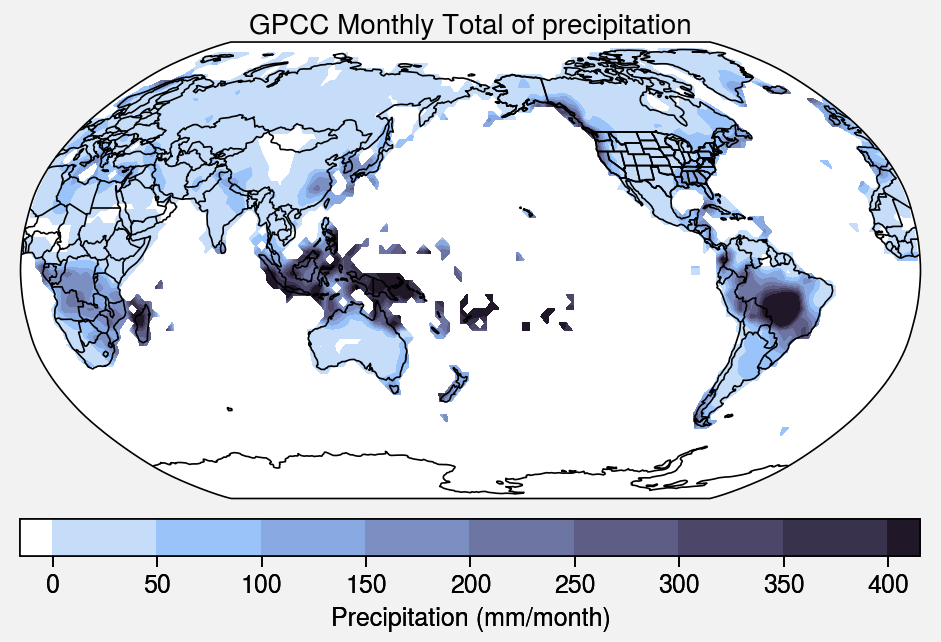

In [13]:
fig, ax = plot.subplots(axwidth=4.5, tight=True,
                        proj='robin', proj_kw={'lon_0': 180},)
# format options
ax.format(land=False, coast=True, innerborders=True, borders=True,
          labels=True, geogridlinewidth=0,)

map1 = ax.contourf(dset['lon'], dset['lat'],
                   dset['precip'][0, :, :],
                   cmap='Dusk',
                   levels=plot.arange(0, 400, 50),
                   extend='both')

ax.colorbar(map1, loc='b', shrink=0.5, extendrect=True, label='Precipitation (mm/month)')
fig.save('gpcc_precipitation.jpeg')
plt.show()

## The Annual March of Precipitation

In [6]:
amazon_area = dset.sel(lat=slice(5, -22), lon=slice(285, 315),
                       time=slice('1981-01-01', '2010-12-01'))

In [14]:
amazon_index = cos_weight(amazon_area['precip']) 
#amazon_index.dims

('time',)

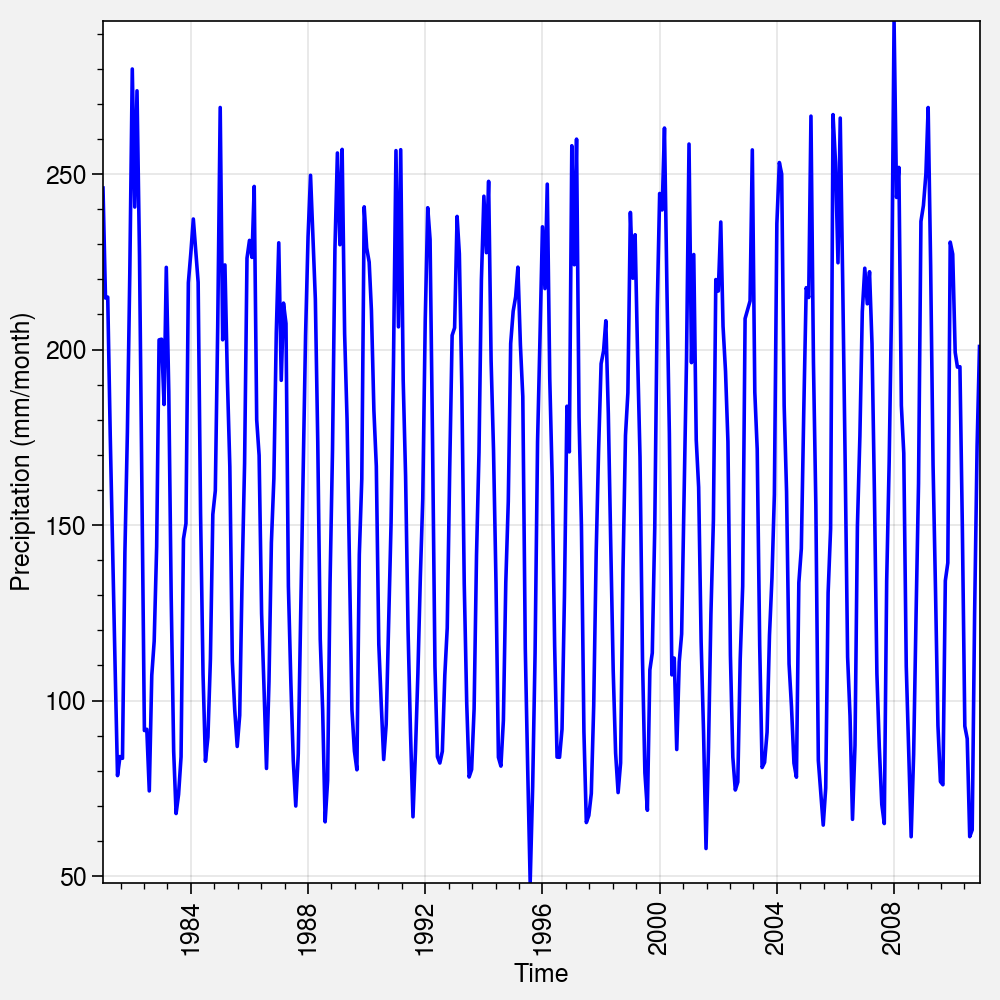

In [15]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True)
ax.plot(amazon_index['time'], amazon_index, color='Blue')
# format options
ax.format(xlabel='Time', ylabel='Precipitation (mm/month)')
fig.save('annualcycle.jpeg')
plt.show()

In [18]:
amazon_index = np.reshape(np.array(amazon_index), (30, 12), order='C')

In [36]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

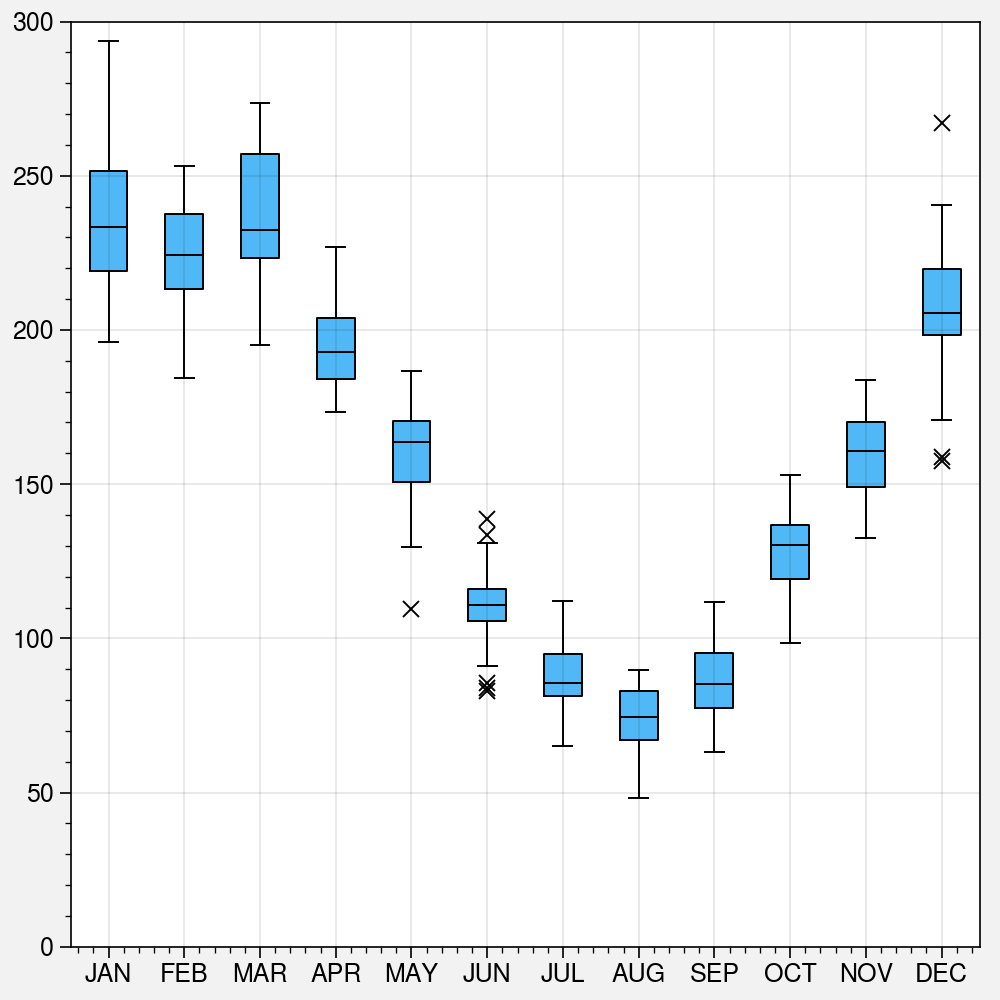

In [46]:
fig, ax = plot.subplots(figsize=(5, 5), tight=True, sharex=False)
ax.format(ylim=(0, 300))

ax[0].boxplot(amazon_index, marker='x', fillcolor='azure', labels=months)

fig.save('boxplot.jpeg')

plt.show()